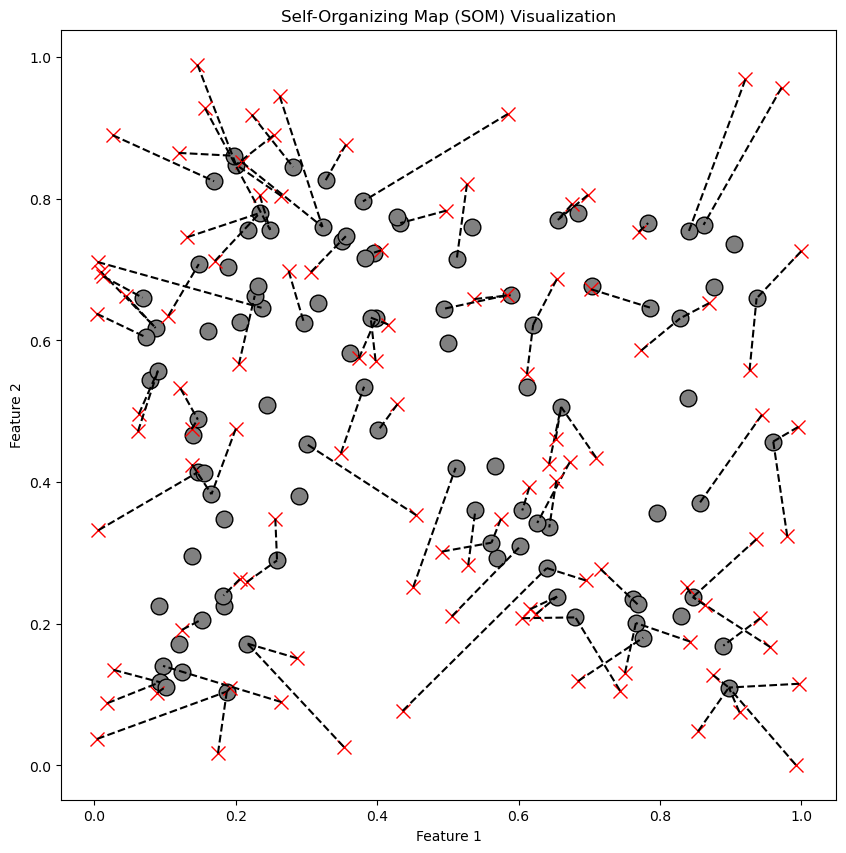

In [2]:
#SELF ORGANISING FEATURE MAP

import numpy as np
import matplotlib.pyplot as plt

class SOM:
    def __init__(self, x, y, input_len, learning_rate=0.5, sigma=None):
        self.x = x
        self.y = y
        self.input_len = input_len
        self.learning_rate = learning_rate
        if sigma is None:
            self.sigma = max(x, y) / 2.0
        else:
            self.sigma = sigma
        self.weights = np.random.rand(x, y, input_len)
        self.initial_learning_rate = learning_rate

    def _euclidean_distance(self, x, y):
        return np.linalg.norm(x - y)

    def _find_bmu(self, input_vector):
        bmu_idx = np.array([0, 0])
        min_dist = np.inf
        for i in range(self.x):
            for j in range(self.y):
                dist = self._euclidean_distance(self.weights[i, j], input_vector)
                if dist < min_dist:
                    min_dist = dist
                    bmu_idx = np.array([i, j])
        return bmu_idx

    def _update_weights(self, input_vector, bmu_idx, iteration, total_iterations):
        learning_rate = self.initial_learning_rate * np.exp(-iteration / total_iterations)
        sigma = self.sigma * np.exp(-iteration / total_iterations)
        for i in range(self.x):
            for j in range(self.y):
                neuron_pos = np.array([i, j])
                dist_to_bmu = np.linalg.norm(neuron_pos - bmu_idx)
                if dist_to_bmu < sigma:
                    influence = np.exp(-dist_to_bmu**2 / (2 * (sigma**2)))
                    self.weights[i, j] += learning_rate * influence * (input_vector - self.weights[i, j])

    def train(self, data, num_iterations):
        for iteration in range(num_iterations):
            input_vector = data[np.random.randint(0, data.shape[0])]
            bmu_idx = self._find_bmu(input_vector)
            self._update_weights(input_vector, bmu_idx, iteration, num_iterations)

    def get_bmus(self, data):
        bmus = []
        for input_vector in data:
            bmu_idx = self._find_bmu(input_vector)
            bmus.append(bmu_idx)
        return np.array(bmus)

# Usage example
data = np.random.rand(100, 3)  # Example data with 100 samples and 3 features
som = SOM(x=10, y=10, input_len=3, learning_rate=0.3)
som.train(data, num_iterations=1000)

# Visualization
bmus = som.get_bmus(data)

# Plotting the SOM weight vectors
fig, ax = plt.subplots(figsize=(10, 10))
for i in range(som.x):
    for j in range(som.y):
        ax.plot(som.weights[i, j, 0], som.weights[i, j, 1], 'o', markersize=12, markeredgecolor='k', markerfacecolor='gray')

# Plotting the input data points and their BMUs
for i, input_vector in enumerate(data):
    bmu_idx = bmus[i]
    bmu_pos = som.weights[bmu_idx[0], bmu_idx[1]]
    ax.plot(input_vector[0], input_vector[1], 'x', color='red', markersize=10)
    ax.plot([input_vector[0], bmu_pos[0]], [input_vector[1], bmu_pos[1]], 'k--')

plt.title('Self-Organizing Map (SOM) Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for minisom: filename=MiniSom-2.3.3-py3-none-any.whl size=11718 sha256=84e9a0f65bfcf93578fc7b7329cb459d16d611e3330abf2da20c183fdedcf68a
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\c8\29\ba\ee521d9a6af783a1e1efb1831fe4afdf526613849b3f58175b
Successfully built minisom


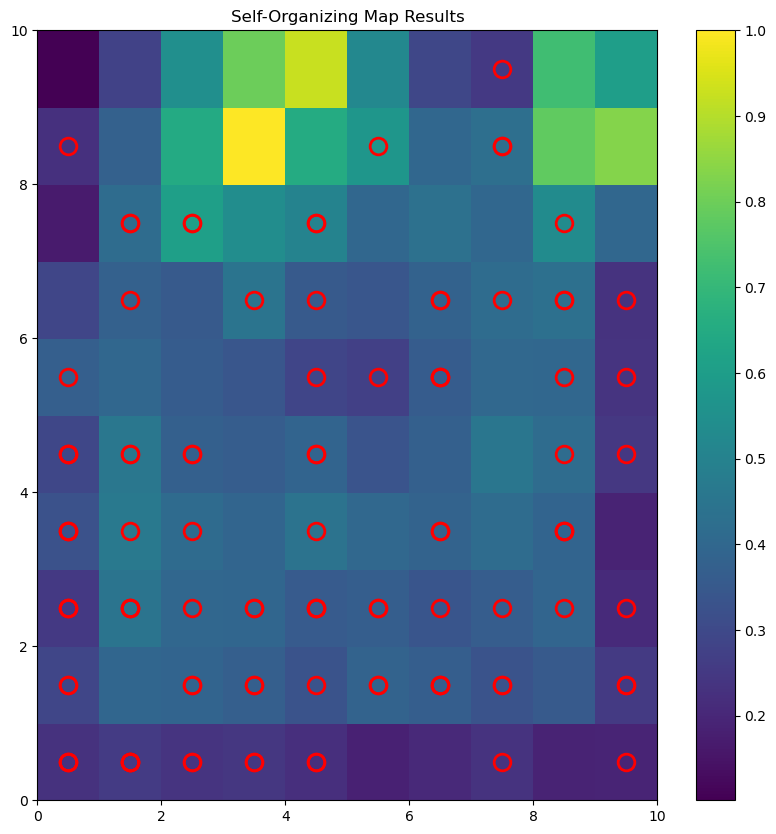

In [2]:
!pip install minisom
from minisom import MiniSom
import numpy as np
import matplotlib.pyplot as plt

# Create and train SOM
data = np.random.rand(100, 3)  # 100 samples, 3 features
som = MiniSom(10, 10, 3, sigma=1.0, learning_rate=0.5)
som.train_random(data, 1000)

# Visualization
plt.figure(figsize=(10, 10))
plt.pcolor(som.distance_map().T)  # Plot distance map
plt.colorbar()

# Plot data points
for i, x in enumerate(data):
    w = som.winner(x)  # Get winning position
    plt.plot(w[0] + .5, w[1] + .5, 'o', markerfacecolor='None',
             markeredgecolor='r', markersize=12, markeredgewidth=2)

plt.title('Self-Organizing Map Results')
plt.show()